<a href="https://colab.research.google.com/github/Alextor121/AI-For-Beginners/blob/main/Clases%20ML%20domestika%20/ejercicio_kmeans_por_poblacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejericico segmentación por pobalción con K-means

Como parte de la lección "Ejercicio de clusterización con K-means", realizaste una clusterización basada en el segmento económico, utilizando el dato de median_income.

Utiliza ese mismo proceso, pero esta vez realiza una clusterización basada en la cantidad de personas que vive en las casas.

Considera que cuentas con los datos “population” y “households”, por lo que podrías crear un nuevo dato para el conjunto llamado pop_per_household (o población por casa), cuyo valor sea el valor de population / households. Esto nos dará un promedio de cuantas personas viven en las casas.

Similar a la lección, realiza clusterizaciones con distintos números de clústers y visualiza el mapa para analizar los resultados.

In [1]:
import pandas as pd
datos = pd.read_csv("housing.csv")
print(datos.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Vamos a crear el dato que significa el promedio de habitantes por casa

In [4]:
prom_hab = pd.DataFrame()

prom_hab = datos['population'] / datos['households']

In [5]:
datos['prom_hab'] = prom_hab

- Ahora a netrenar el modelo

In [6]:
from sklearn.cluster import KMeans
import seaborn as sb
x = datos.loc[:, ['latitude', 'longitude', 'prom_hab']]

In [8]:
modelo = KMeans(n_init = 3, n_clusters = 5)
predicciones = modelo.fit_predict(x)

In [10]:
x['segmento'] = predicciones
x['segmento'].value_counts()

0    11960
3     8676
2        2
4        1
1        1
Name: segmento, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

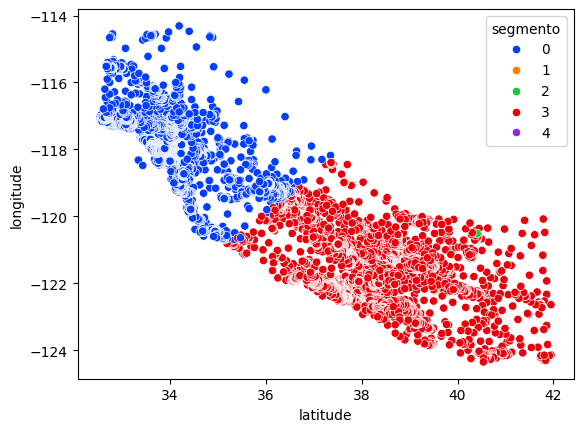

In [11]:
sb.scatterplot(x='latitude', y='longitude', data=x, hue='segmento', palette='bright')

<ipython-input-12-a559a03fde88>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='segmento', data=x, palette='bright')


<Axes: xlabel='segmento', ylabel='count'>

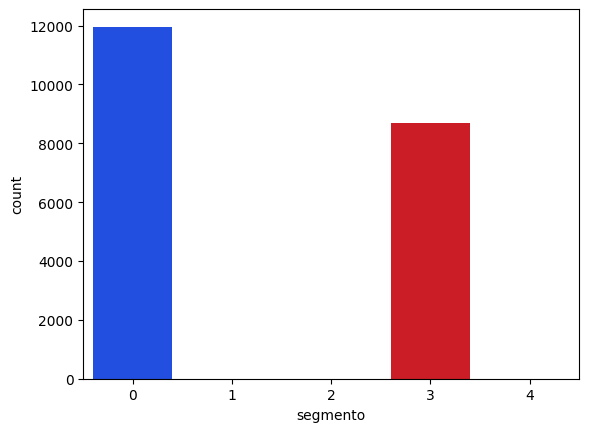

In [12]:
sb.countplot(x='segmento', data=x, palette='bright')

In [13]:
x.groupby(['segmento'])['prom_hab'].mean()

segmento
0       3.057864
1    1243.333333
2     551.087912
3       2.792829
4     230.172414
Name: prom_hab, dtype: float64